In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
os.listdir('/Users/qihou/HAM10000_train')

['akiec', '.DS_Store', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel']

In [3]:
os.listdir('/Users/qihou/HAM10000_test')

['akiec', '.DS_Store', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel']

In [4]:
train_dir = '/Users/qihou/HAM10000_train'
test_dir = '/Users/qihou/HAM10000_test'

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1/255) 
test_datagen = ImageDataGenerator(rescale = 1/255)

train_gen = train_datagen.flow_from_directory(train_dir, batch_size=6)
test_gen = test_datagen.flow_from_directory(test_dir, batch_size=6)

Found 8012 images belonging to 7 classes.
Found 2003 images belonging to 7 classes.


In [7]:
x, y = next(train_gen)
x.shape, y.shape

((6, 256, 256, 3), (6, 7))

In [8]:
train_gen.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [9]:
df = pd.read_csv('/Users/qihou/HAM10000_metadata.csv')

In [10]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [11]:
#import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input, Dropout
from tensorflow.keras.layers import BatchNormalization

In [67]:
pool_size = (4,4)
kernel_size = (3,3)

x_in = Input(shape = (256, 256, 3))

x = Conv2D(filters = 16, kernel_size = kernel_size, activation = 'relu', padding = 'Same')(x_in)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = pool_size)(x)

x = Conv2D(filters = 32, kernel_size = kernel_size, activation = 'relu', padding = 'Same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = pool_size)(x)

x = Conv2D(filters = 64, kernel_size = kernel_size, activation = 'relu', padding = 'Same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = pool_size)(x)

x_flatten = Flatten()(x)
x = Dropout(0.5)(x_flatten)
x = Dense(64, activation = 'relu')(x)

x_out = Dense(7, activation= 'softmax')(x) 

In [68]:
model = Model(x_in, x_out)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization_36 (Batc (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
batch_normalization_37 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 32)        0   

In [69]:
model.compile(optimizer ='adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [84]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch = len(train_gen),
    epochs = 20,
    validation_data = test_gen,
    validation_steps = len(test_gen),
    workers=4
)

Epoch 1/20
1336/1336 [==============================] - 353s 264ms/step - loss: 0.5022 - acc: 0.8107 - val_loss: 0.7330 - val_acc: 0.7524
Epoch 2/20
1336/1336 [==============================] - 355s 266ms/step - loss: 0.4900 - acc: 0.8174 - val_loss: 0.6814 - val_acc: 0.7728
Epoch 3/20
1336/1336 [==============================] - 343s 256ms/step - loss: 0.4867 - acc: 0.8160 - val_loss: 0.8155 - val_acc: 0.7239
Epoch 4/20
1336/1336 [==============================] - 347s 260ms/step - loss: 0.4795 - acc: 0.8219 - val_loss: 0.6984 - val_acc: 0.7549
Epoch 5/20
1336/1336 [==============================] - 349s 261ms/step - loss: 0.4768 - acc: 0.8226 - val_loss: 0.6261 - val_acc: 0.7743
Epoch 6/20
1336/1336 [==============================] - 350s 262ms/step - loss: 0.4619 - acc: 0.8281 - val_loss: 0.7106 - val_acc: 0.7604
Epoch 7/20
1336/1336 [==============================] - 348s 261ms/step - loss: 0.4680 - acc: 0.8231 - val_loss: 0.6546 - val_acc: 0.7549
Epoch 8/20
1336/1336 [============

In [85]:
loss, acc = model.evaluate_generator(test_gen)

In [86]:
loss_train, acc_train = model.evaluate_generator(train_gen)

In [87]:
loss_train, acc_train

(0.27698376868529306, 0.8962806)

In [88]:
loss_test, acc_test

(0.6618561749339583, 0.77334)

In [75]:
x, y = next(test_gen)
x.shape, y.shape

((6, 256, 256, 3), (6, 7))

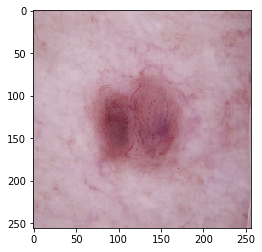

In [103]:
plt.imshow(x[0])

In [100]:
model.predict(x)

array([[2.7793194e-03, 1.1130988e-01, 6.2592164e-02, 6.8057235e-04,
        2.3331789e-02, 7.9893970e-01, 3.6661624e-04],
       [8.5504148e-03, 7.1473967e-04, 6.5616137e-01, 2.8228428e-04,
        2.4290785e-01, 9.1383323e-02, 3.0273590e-08],
       [5.2926912e-06, 2.9047574e-03, 5.9677684e-03, 1.3464756e-06,
        6.2658689e-03, 9.8479557e-01, 5.9439466e-05],
       [9.7326756e-06, 3.2266858e-03, 3.1234752e-02, 1.3385941e-05,
        3.1378299e-03, 9.6237344e-01, 4.1600638e-06],
       [1.6183013e-10, 9.6845987e-10, 1.3707960e-05, 4.6869300e-09,
        1.8001023e-06, 9.9998450e-01, 3.8401353e-09],
       [1.7336651e-09, 1.5214941e-04, 1.4484592e-04, 1.4263943e-10,
        1.0232686e-03, 9.9805152e-01, 6.2817353e-04]], dtype=float32)

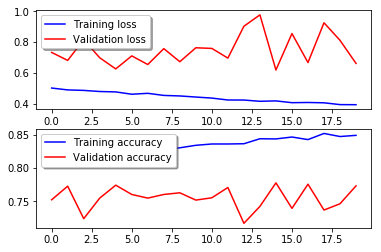

In [94]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='upper left', shadow=True)